### Simulate in HSpice

In [1]:
HSPICE_INSTANCE = "../../hspice.sh"

NET_PATH = "./netlists/test8x8.hspice.net"
TR0_PATH = "./test8x8.hspice.tr0"

In [ ]:
!$HSPICE_INSTANCE $NET_PATH 2> /dev/null

### Import library

In [3]:
import sys
sys.path.append('../') ## Change accordingly

from my_hspice import read_hspice_tr

### Parse HSpice output

In [4]:
gg = read_hspice_tr(filename=TR0_PATH)

In [5]:
# Keep the current readings only
kk = dict()
for key in gg.keys():
    if key.startswith('i'):
        kk[key] = gg[key][-1]
kk

{'i(v.bit0)': 0.2117,
 'i(v.bit1)': 0.0668,
 'i(v.bit2)': 0.2171,
 'i(v.bit3)': 0.1245,
 'i(v.bit4)': 0.1254,
 'i(v.bit5)': 0.2153,
 'i(v.bit6)': 0.1442,
 'i(v.bit7)': 0.1451,
 'i(v.word0)': -0.206,
 'i(v.word1)': -0.1357,
 'i(v.word2)': -0.1374,
 'i(v.word3)': -0.1301,
 'i(v.word4)': -0.1318,
 'i(v.word5)': -0.219,
 'i(v.word6)': -0.1442,
 'i(v.word7)': -0.1459}

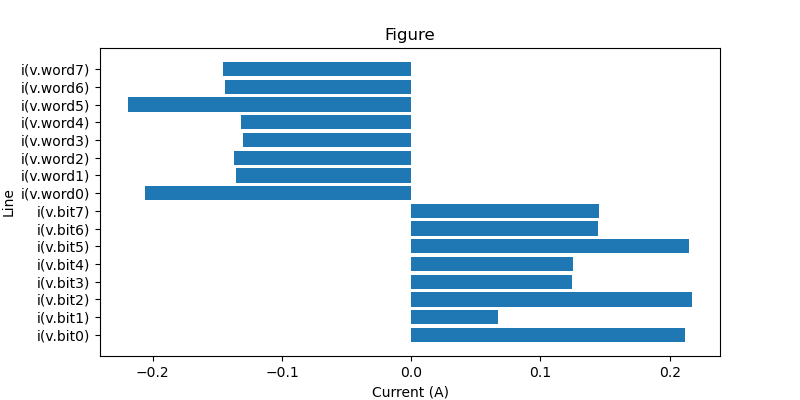

In [6]:
%matplotlib widget
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))

y = list(kk.values())
x = list(kk.keys())
plt.barh(x, y, label="Current")

plt.title('Figure')
plt.xlabel('Current (A)')
plt.ylabel('Line')
plt.ion()
plt.show()

### Cleanup

In [7]:
!rm *.crash *.ic? *.pa? *.st? *.tr? *.lis

rm: cannot remove '*.crash': No such file or directory
rm: cannot remove '*.lis': No such file or directory
